# Laboratório de Processamento de Sinais para Comunicações
##  Prárica 01 - Amostragem

### Aluno - Matrícula:

Ezequias Márcio Silva de Santana Júnior - 371887

In [3]:
# Importando os módulos necessários para a execução do código.
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
%matplotlib inline


In [16]:
"""
TODO:

      para qualquer arqivo audio... ver periodograma para tirar o niquist....(ler a teoria e tirar duvida)
       ver como fica a questão de olhar o sinal em x tempo pois depende do numero de amostras e
        a taxa..que nem estoc
                                                            ver para casos que atendem
testar os reconstrutores!!!! ver se usa np.convolve...
debugar o código para linearidade de código fonte, alterações etc...tente py puro frist
sinal reconstruido e atenuação ??? obser var os valores num data frame......

fazer para qualquer tempo = ver como fica o porque da fórmula de como retirar o tempo de amostragem! OK

generalizar o amostrador ANTES DAS ALTERAÇÕES :

essas aqui...:

+ awgn após amostragem e avaliar desempenho do reconstrutor
variancias = [1e-3, 1e-1]
e fazer um sound
"""

'\nTODO:\n\n      para qualquer arqivo audio... ver periodograma para tirar o niquist....(ler a teoria e tirar duvida)\n       ver como fica a questão de olhar o sinal em x tempo pois depende do numero de amostras e\n        a taxa..que nem estoc\n                                                            ver para casos que atendem\ntestar os reconstrutores!!!! ver se usa np.convolve...\ndebugar o código para linearidade de código fonte, alterações etc...tente py puro frist\nsinal reconstruido e atenuação ??? obser var os valores num data frame......\n\nfazer para qualquer tempo = ver como fica o porque da fórmula de como retirar o tempo de amostragem! OK\n\ngeneralizar o amostrador ANTES DAS ALTERAÇÕES :\n\nessas aqui...:\n\n+ awgn após amostragem e avaliar desempenho do reconstrutor\nvariancias = [1e-3, 1e-1]\ne fazer um sound\n'

In [ ]:
# defino sinal
SR = 500
i, f = 0, 1
time = np.linspace(i, f, SR*(f - i))
sinal=np.sin(2*np.pi*1*time)

# amostrar  na freq:
sample_freq = 25 

# o tamanho do vetor tem uma a mais pois conta o instante 0

print('numero de amostras: {}'.format( time.size))
# tirei o +1 !!!!!!!!!!!!!!!!!!! endpoint= false
# significa que amostrou no instante 0 até o instante após os tempos de amostragem
#

ts, step = np.linspace(i, f, int(sample_freq*(time[-1]-time[0])), endpoint=False, retstep=True)
print('tempo: \n{}\nTamanho do vetor tempo e periodo de'
      'amostragem: \n{}, {}'.format(ts, ts.size, step))

sampled = np.zeros(ts.size)
print('tamanho alocado sinal amostrado: \n{}'.format(sampled.size))

# retira o  -1  !!!!!!!!!!!!!!!!!! fica mais coerente pois não 
# tem o um a mais do instante 0
#

Ts = 1/(sampled.size)*(time[-1]-time[0]) # garanto que recupero o mesmo Ts ...
print('período de amostragem e o quanto a cada amostas: \n{}, {}'.format(Ts, 1/Ts,'\n'))

print('instantes de amostragem numero\n {}, {}'.format( ts*SR, ts.size))
s = ts*SR
print('tamanho sinal: \n{}'.format( sinal.size))

print('teste amostrador!')
for i in range(ts.size):
    if i == 0:
        print(i, int(s[i]), sinal[i])
        sampled[i] = sinal[i]
    else:
        print(i, int(s[i]-1), sinal[int(s[i])-1])
        sampled[i] = sinal[int(s[i])-1]
        
print('iterações: {}'.format(i + 1))
print('Sinal amostrado e tamanho: \n{}, {}'.format(sampled, sampled.size))
# print(test, np.array(test).size)
# 500 termos do 0 ao 500-1
#for com indicex multiplos

In [4]:
# Funções implementadas para a recureção:
def rec_zero_order(sampled, time):
    """
    Função que implementa a interpolação de ordem zero, utilizando um filtro de interpolação
    retangular.
    """
    def rect(x):
        """
        Função da resposta ao impulso do filtro retangular.
        """
        if abs(x) > 0.5:
            return 0
        elif abs(x) < 0.5:
            return 1
        else:
            return 0.5
    
    # Período de amostragem: número de intervalos*tamanho do intervalo de tempo
    Ts = 1/(sampled.size)*(time[-1]-time[0])
    
    # Variável que recebe o sinal recuperado:
    zero_order = np.zeros(time.size)
    
    # Convolução:
    for t in range(time.size):
        soma = 0
        for n in range(sampled.size):
            soma += rect((time[t] - 0.5*Ts - n*Ts)/Ts)*sampled[n]
        zero_order[t] = soma
    
    return zero_order


def rec_linear_interp(sampled, time):
    """
    Função que implementa recuperação do sinal via interpolação linear 1D.
    """
    
#     rec_lin = np.zeros(sr)
#     for t in range(sr):
#         for i in range(len(sampled)-1):
#             if time[t] > ts[i] and time[t] < ts[i+1]:
#                 rec_lin[t] = sampled[i] + (time[t] - ts[i])*\
#                          (sampled[i+1] - sampled[i])/(ts[i+1] - ts[i])
    
    ts = np.linspace(min(time), max(time), sampled.size)
    
    return np.interp(time, ts, sampled) # return rec_lin


def rec_ideal_interp(sampled, time):
    """
    Função que implementa a interpolação ideal, utilizando um filtro de interpolação
    sinc.
    """
    # Período de amostragem:  número de intervalos*tamanho do intervalo de tempo
    Ts = 1/(sampled.size - 1)*(time[-1]-time[0])
    
    # Variável que recebe o sinal recuperado:
    ideal = np.zeros(time.size)
    
    # Convolução:
    for t in range(time.size):
        soma = 0
        for n in range(sampled.size):
            soma += np.sinc((time[t]  - n*Ts)/Ts)*sampled[n]
        ideal[t] = soma
    
    return ideal


### Plotando sinal:

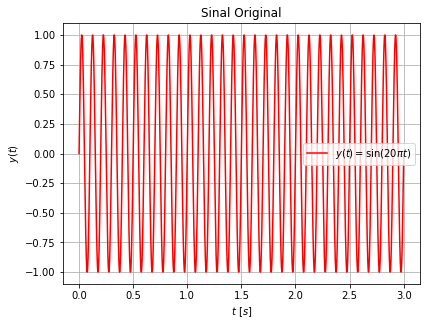

In [6]:
# Definindo sample rate global em 3.2k amostras em 1 segundo, simulando sinal o contínuo:
sr = 1600 # 3.2kHz

# Valores de t in [i, f] segundos:
i = 0
f = 3
time = np.linspace(i, f, sr)

# Construção do sinal:
freq = 10 # Hz
signal = np.sin(2*np.pi*freq*time)

# Plotando a curva:
dim = 1*6.4                                          # Dimensões da figura (múltiplos de 6.4)
plt.figure('analog_signal', figsize=[dim, 0.75*dim]) # Inicializando figura
plt.title('Sinal Original')                          #
plt.xlabel('$t$ [$s$]')                              # Título, eixos
plt.ylabel('$y(t)$')                                 #
plt.plot(time, signal, 'r', label='$y(t) = \sin(20\pi t)$') # plot
#plt.axis([-0.025, 1.025, -1.25, 1.25])              # Trata os eixos (opcional)
plt.grid()                                           # Habilita o grid
plt.legend(loc='best')#'upper right')                # Habilita a legenda (opcional)
plt.show()                                           # Mostra a figura


### Amostragem:

#### Iterativa:

In [15]:
# Amostrador Iterativo
def sampler(sample_freq, i, f):
    
    dim = 1.25*6.4
    plt.figure('sampled_signal', figsize=[dim, 0.75*dim])
    plt.plot(time, signal, 'r:')
    
    # Uso do arange: anda n vezes o passo e amostra n+1 vezes, ou seja fs = fs+1
    # ts = np.arange(0, 1 + 1/sample_freq, 1/sample_freq) # passo = 1/fs 
    # Considerando que freqência de amostragem é nº de amostras por segundo * o intervalo de tempo em segundos
    ts = np.linspace(i, f, int(sample_freq*(time[-1]-time[0])))
    samp_signal = np.sin(2*np.pi*freq*ts)
    plt.stem(ts, samp_signal, linefmt='-C0', markerfmt='C0o', basefmt='k-')
    
    plt.title('Sinal Amostrado @ $f_s$ {}Hz'.format(sample_freq))
    plt.xlabel('$t$ [$s$]')
    plt.ylabel('Amplitude') 
    plt.plot(time, signal, 'r--', label='$y(t)$')
    
    plt.grid()
    plt.show('sampled_signal')
    
    # ------------------------------------------------------------------------------------------
    
    # Recuperando o sinal:
    signal_zero_ord = rec_zero_order(samp_signal, time)
    signal_linear = rec_linear_interp(samp_signal, time)
    signal_ideal = rec_ideal_interp(samp_signal, time)

    # Cálculo e armazenamento do MSE em um vetor:
    erro = np.zeros((3, sr))
    erro[0] = signal - signal_zero_ord
    erro[1] = signal - signal_linear
    erro[2] = signal - signal_ideal

    mse = np.array([np.mean(erro[i,:]**2) for i in range(3)])
    print(mse)
    
    # ------------------------------------------------------------------------------------------
    
    dim = 2.5*6.4 
    fig, ax = plt.subplots(3, 2, sharex='col', 
                           sharey='row', 
                           num='results', 
                           figsize=[dim, 0.75*dim])

    # Parâmetros do texto:
    style = dict(size=13, color='black')

    # Plots:
    ax[0, 0].plot(time, signal_zero_ord, 'k-', label='$ŷ_{zero}(t)$')
    ax[0, 0].plot(time, signal, 'C3--', label='$y(t)$')
    ax[0, 0].grid()

    ax[0, 1].plot(time, erro[0], 'C4-', label='y(t) - $ŷ_{zero}(t)$')
    ax[0, 1].text(0.2, -0.75, 'Mean Square Error: {:.4f}'.format(mse[0]), **style)
    ax[0, 1].grid()

    ax[1, 0].plot(time, signal_linear, 'k-', label='$ŷ_{linear}(t)$')
    ax[1, 0].plot(time, signal, 'C3--', label='$y(t)$')
    ax[1, 0].grid()

    ax[1, 1].plot(time, erro[1], 'C4-', label='y(t) - $ŷ_{linear}(t)$')
    ax[1, 1].text(0.2, -0.75, 'Mean Square Error: {:.5f}'.format(mse[1]), **style)
    ax[1, 1].grid()

    ax[2, 0].plot(time, signal_ideal, 'k-', label='y(t) - $ŷ_{sinc}(t)$')
    ax[2, 0].plot(time, signal, 'C3--', label='$y(t)$')
    ax[2, 0].grid()

    ax[2, 1].plot(time, erro[2], 'C4-', label='y(t) - $ŷ_{sinc}(t)$')
    ax[2, 1].text(0.2, -0.75, 'Mean Square Error: {:.5f}'.format(mse[2]), **style)
    ax[2, 1].grid()

    # Textos e legendas:
    ax[0, 0].set_title('Sinal Recuperado ŷ(t)')
    ax[0, 1].set_title('Erro')

    for i in range(3):
        ax[i, 0].set_ylabel('Amplitude')

    ax[2, 0].set_xlabel('$t$ [$s$]')
    ax[2, 1].set_xlabel('$t$ [$s$]')

    ax[0, 0].legend(loc='lower left')
    ax[1, 0].legend(loc='lower left')
    ax[2, 0].legend(loc='best')
    ax[0, 1].legend()
    ax[1, 1].legend()
    ax[2, 1].legend()

    plt.show('resuls')
    
    return samp_signal

w2 = widgets.interactive(sampler, sample_freq=[4, 8, 12, 25, 50, 51, 64, 70, 75], i=[0, 1], f=[3, 5])#(9, 65, 1))
display(w2)
# ? da pra fazer tudo iterativo ?

interactive(children=(Dropdown(description='sample_freq', options=(4, 8, 12, 25, 50, 51, 64, 70, 75), value=4)…

In [ ]:
# Salvando resultados
samp_signal = w2.result
print(samp_signal.size)

#### Via linha de comando:

0 3


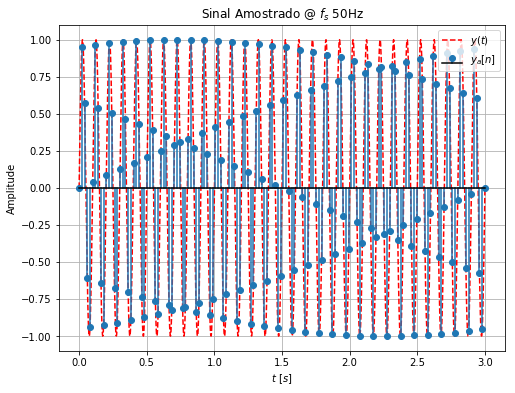

In [11]:
# Definindo frequência de amostragem:                      Nyquist: 62.83185307179586 (2*pi*10)
sample_freq = 50 #Hz
print(i,f)
# Instantes de tempo em que o sinal é amostrado:  ALTERAR PQ FOI AMOSTRADO COMO SE O SINAL TIVESSE 1S SEMPRE
ts = np.linspace(i, f, int(sample_freq*(time[-1]-time[0])))

# Amostras do sinal
samp_signal = np.sin(2*np.pi*freq*ts)

# Plotagem do sinal amostrado e original
dim = 1.25*6.4 
plt.figure('sampled_signal', figsize=[dim, 0.75*dim])
plt.title('Sinal Amostrado @ $f_s$ {}Hz'.format(sample_freq))
plt.xlabel('$t$ [$s$]')
plt.ylabel('Amplitude') 
plt.plot(time, signal, 'r--', label='$y(t)$')
plt.stem(ts, samp_signal, linefmt='-C0', markerfmt='C0o', basefmt='k-', label='$y_a[n]$')
plt.stem
#plt.axis([-0.025, 1.025, -1.25, 1.25])              # Trata os eixos (opcional)
plt.grid()                                           # Habilita o grid
plt.legend(loc='best')#'upper right')                # Habilita a legenda (opcional)
plt.show()                                           # Mostra a figura


### Recuperação:

In [12]:
# Recuperando o sinal:
signal_zero_ord = rec_zero_order(samp_signal, time)
signal_linear = rec_linear_interp(samp_signal, time)
signal_ideal = rec_ideal_interp(samp_signal, time)

# Cálculo e armazenamento do MSE em um vetor:
erro = np.zeros((3, sr))
erro[0] = signal - signal_zero_ord
erro[1] = signal - signal_linear
erro[2] = signal - signal_ideal

mse = np.array([np.mean(erro[i,:]**2) for i in range(3)])
print(mse)

[2.45754122e-01 9.94336982e-03 1.66878456e-04]


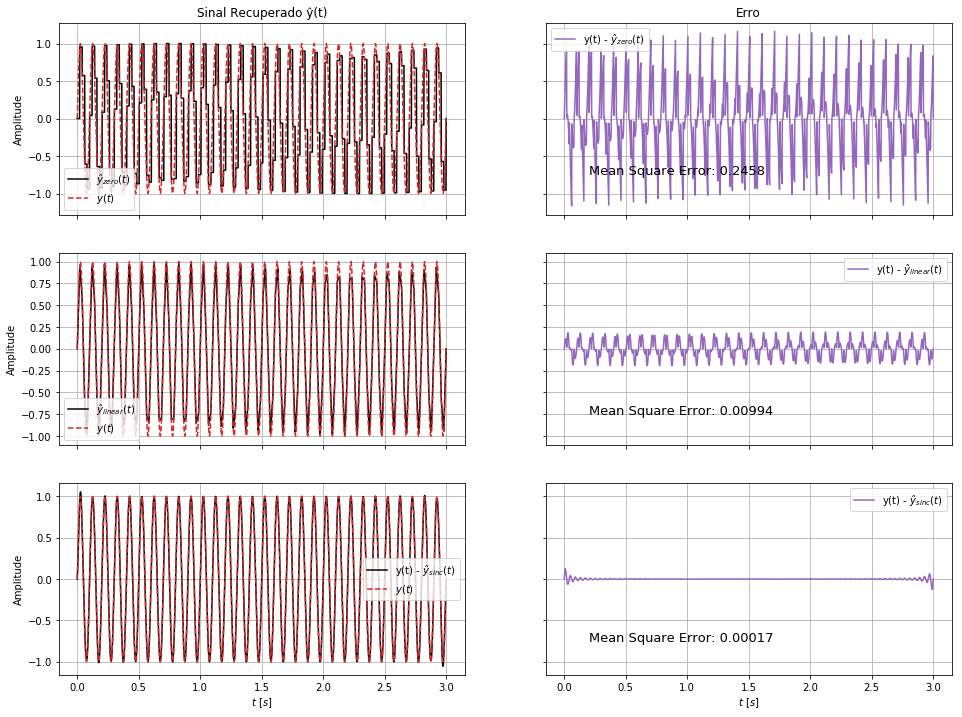

In [13]:
dim = 2.5*6.4 
fig, ax = plt.subplots(3, 2, sharex='col', sharey='row', 
                       num='results', figsize=[dim, 0.75*dim])

# Parâmetros do texto:
style = dict(size=13, color='black')

# Plots:
ax[0, 0].plot(time, signal_zero_ord, 'k-', label='$ŷ_{zero}(t)$')
ax[0, 0].plot(time, signal, 'C3--', label='$y(t)$')
ax[0, 0].grid()

ax[0, 1].plot(time, erro[0], 'C4-', label='y(t) - $ŷ_{zero}(t)$')
ax[0, 1].text(0.2, -0.75, 'Mean Square Error: {:.4f}'.format(mse[0]), **style)
ax[0, 1].grid()

ax[1, 0].plot(time, signal_linear, 'k-', label='$ŷ_{linear}(t)$')
ax[1, 0].plot(time, signal, 'C3--', label='$y(t)$')
ax[1, 0].grid()

ax[1, 1].plot(time, erro[1], 'C4-', label='y(t) - $ŷ_{linear}(t)$')
ax[1, 1].text(0.2, -0.75, 'Mean Square Error: {:.5f}'.format(mse[1]), **style)
ax[1, 1].grid()

ax[2, 0].plot(time, signal_ideal, 'k-', label='y(t) - $ŷ_{sinc}(t)$')
ax[2, 0].plot(time, signal, 'C3--', label='$y(t)$')
ax[2, 0].grid()

ax[2, 1].plot(time, erro[2], 'C4-', label='y(t) - $ŷ_{sinc}(t)$')
ax[2, 1].text(0.2, -0.75, 'Mean Square Error: {:.5f}'.format(mse[2]), **style)
ax[2, 1].grid()

# Textos e legendas:
ax[0, 0].set_title('Sinal Recuperado ŷ(t)')
ax[0, 1].set_title('Erro')

for i in range(3):
    ax[i, 0].set_ylabel('Amplitude')

ax[2, 0].set_xlabel('$t$ [$s$]')
ax[2, 1].set_xlabel('$t$ [$s$]')

ax[0, 0].legend(loc='lower left')
ax[1, 0].legend(loc='lower left')
ax[2, 0].legend(loc='best')
ax[0, 1].legend()
ax[1, 1].legend()
ax[2, 1].legend()

plt.show('resuls')


In [ ]:
whos

### Quantização ....

In [ ]:
b = 2
v = 2**b

print('bits: {}, níveis {}'.format(b, v))

sinal_quantizado = np.abs(np.rint(samp_signal*v)*1/v)

print(max(samp_signal), max(samp_signal)/2**b)

dim = 6.4*2.25
plt.figure(figsize=[dim, dim*0.75])

plt.subplot(3, 2, 3)
plt.title('quantizado')
plt.stem(ts, sinal_quantizado)

plt.subplot(3, 2, 2)
plt.title('erro quantização')
plt.stem(ts, samp_signal - sinal_quantizado)
plt.axis([0, 1, -1, 1])

plt.subplot(3, 2, 1)
plt.title('amostrado')
plt.stem(ts, samp_signal)

print(samp_signal)
print(sinal_quantizado)

# teste
for i in range(samp_signal.size):
    if abs(samp_signal[i] - sinal_quantizado[i]) >= max(samp_signal)/2**b:
        print('aqui',samp_signal[i] - sinal_quantizado[i])
        
print('\n eqm quantização', np.mean((samp_signal - sinal_quantizado)**2))

In [ ]:
f = max(samp_signal)
i = min(samp_signal)
b = 1
delta = max(samp_signal)/2**b

print(delta)
# for i in range(samp_signal.size):
#     print(abs(samp_signal[i]))

np.linspace(i, f, int(1/delta))


In [ ]:
frequencias = 66
tempo = np.linspace(0, 1, 1600)
sinal_original = np.sin(20*np.pi*tempo)
erros = np.zeros((3, frequencias - 1))

for i in range(2, frequencias):
    
    tempo_amostragem = np.linspace(0, 1, i)
    sinal_amostrado = np.sin(20*np.pi*tempo_amostragem)
    
    # recupera
    zero_ord = rec_zero_order(sinal_amostrado, tempo)
    linear = rec_linear_interp(sinal_amostrado, tempo)
    ideal = rec_ideal_interp(sinal_amostrado, tempo)
    
    #erros
    erros[0, i - 1] = np.mean((sinal_original - zero_ord)**2)
    erros[1, i - 1] = np.mean((sinal_original - linear)**2)
    erros[2, i - 1] = np.mean((sinal_original - ideal)**2)


In [ ]:
strtt = ['erros zero order vs freq amostragem', 
         'erros linear vs freq amostragem',
         'erros sinc vs freq amostragem']
dim = 1.55*6.4
plt.figure(figsize=[dim, dim*0.75])
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.title(strtt[i])
    plt.ylabel('erro')
    plt.plot(np.arange(2, 67), erros[i, :])

## Ideias trabalho...

upsampling and downsampling ??


In [ ]:
# TODO: Organizar

# explicar funcionamento...  https://en.wikipedia.org/wiki/Zero-order_hold
# explicar funcionamento...  http://fourier.eng.hmc.edu/e101/lectures/Sampling_theorem/node3.html

# linspace anda 10 deltas e amostra 11 vezes
# arange anda 11 deltas amostra 12 vezes
# n = 26
# print(np.arange(0, 1+1/n, 1/n)) 
# np.linspace(0, 1, n)


# import IPython.display as ipd
# ipd.Audio(0.001*np.sin(2*np.pi*10*time), rate=32000)

# teste
# dim = 1*6.4            # alargamento proporcional 
# l = 1                  # alargamento horizontal
# plt.figure('rec_signal_0', figsize=[dim*l, 0.75*dim])

# b=0
# np.arange(0, 1+1/2**b, 1/2**b)
